In [1]:
import librosa
import soundfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [2]:
K = 100

In [4]:
filter, sr_filter = librosa.load(r"C:\Users\johny\Desktop\sprung_orig.wav", sr=None)
noisy, sr_noisy = librosa.load(r"C:\Users\johny\Desktop\Sprung.wav", sr=None)
assert sr_filter == sr_noisy

In [5]:
filter_smooth = np.convolve(filter, np.ones(K) / K, mode="same")
noisy_smooth = np.convolve(noisy, np.ones(K) / K, mode="same")
assert filter_smooth.shape[0] == filter.shape[0]
assert noisy_smooth.shape[0] == noisy.shape[0]

In [6]:
corr_smooth = correlate(noisy_smooth, filter_smooth, mode="same")
corr = correlate(noisy, filter, mode="same")
assert corr_smooth.shape[0] == noisy_smooth.shape[0]
assert corr.shape[0] == noisy.shape[0]

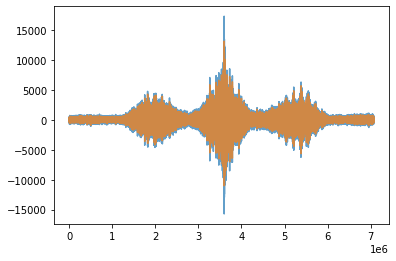

In [7]:
plt.plot(corr, alpha=0.7)
plt.plot(corr_smooth, alpha=0.7)

In [8]:
start_sample = int(np.argmax(corr) - filter_smooth.shape[0] / 2)
start_time = start_sample / sr_filter
start_time

2.5722902494331064

In [9]:
soundfile.write(r"C:\Users\johny\Desktop\coupdebain-start.wav", noisy[start_sample:], sr_filter)